In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels import api as sm

import matplotlib.animation as ani
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from pathlib import Path

# Load the file into a dataframe and checkout the structure
projectDir = Path('.').resolve().parents[2]

# Read in CSV file, Convert NaN values to 0's
airport = 'SEA'
df = pd.read_csv(f'{projectDir}/data/processed/tsa/throughput/TsaThroughput.{airport}.csv', header='infer')
df.fillna(0, inplace=True)
df.Date = pd.to_datetime(df['Date'])

# Sum up the amount numbers by day for our graph
df['Total'] = df.sum(axis = 1, skipna = True)

ModuleNotFoundError: No module named 'statsmodels'

In [2]:
dfg = df.groupby('Date', as_index=True).agg({'Total': 'sum'})
print(dfg.head())
dfg.index

              Total
Date               
2018-12-30  55218.0
2018-12-31  46282.0
2019-01-01  49470.0
2019-01-02  51829.0
2019-01-03  48022.0


DatetimeIndex(['2018-12-30', '2018-12-31', '2019-01-01', '2019-01-02',
               '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06',
               '2019-01-07', '2019-01-08',
               ...
               '2021-02-25', '2021-02-26', '2021-02-27', '2021-02-28',
               '2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
               '2021-03-05', '2021-03-06'],
              dtype='datetime64[ns]', name='Date', length=784, freq=None)

In [4]:
y = dfg['Total'].resample('MS').mean()
y

Date
2018-12-01    50750.000000
2019-01-01    42069.967742
2019-02-01    43668.964286
2019-03-01    48938.838710
2019-04-01    50871.133333
2019-05-01    52982.193548
2019-06-01    60915.700000
2019-07-01    63901.483871
2019-08-01    65787.387097
2019-09-01    56525.766667
2019-10-01    51768.322581
2019-11-01    49014.033333
2019-12-01    53920.032258
2020-01-01    44065.870968
2020-02-01    45409.862069
2020-03-01    19555.451613
2020-04-01     3111.750000
2020-05-01     6004.225806
2020-06-01    12114.800000
2020-07-01    16206.129032
2020-08-01    17589.387097
2020-09-01    17877.966667
2020-10-01    19000.580645
2020-11-01    17707.833333
2020-12-01    17377.193548
2021-01-01    14743.612903
2021-02-01    17957.571429
2021-03-01    19362.833333
Freq: MS, Name: Total, dtype: float64

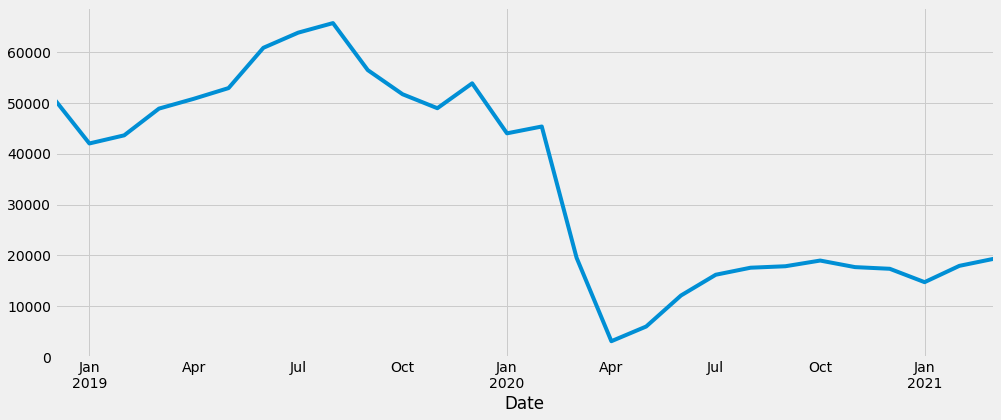

In [6]:
plt.style.use('fivethirtyeight')
y.plot(figsize=(15, 6))

plt.show()

In [9]:
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

In [9]:
def setupChart(plt):
	plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
	
	ax = plt.gca()
	
	ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
	ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
	ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

	ax.yaxis.set_major_locator(ticker.MultipleLocator(100000))
	ax.yaxis.set_minor_locator(ticker.MultipleLocator(20000))

	plt.title(f'{airport} TSA Throughput by Date', fontsize=24)
	plt.ylabel('Number of Passengers', fontsize=16)
	plt.xlabel('Date', fontsize=16)

	plt.grid(True)

	return plt

In [10]:
def buildAreaChart(plt, df):
	plt.stackplot(df['Date'], df['Total'], labels='Total', colors='blue')
	return plt

In [11]:
def buildLineChart(plt, df):
	plt.plot(df['Date'], df['Total'], color='blue', label='Total')

	return plt

In [12]:
def animateChart(i = int):
	p = plt.plot(dfg.loc[:i,'Date'], dfg.loc[:i, 'Total'])

<Figure size 432x288 with 0 Axes>

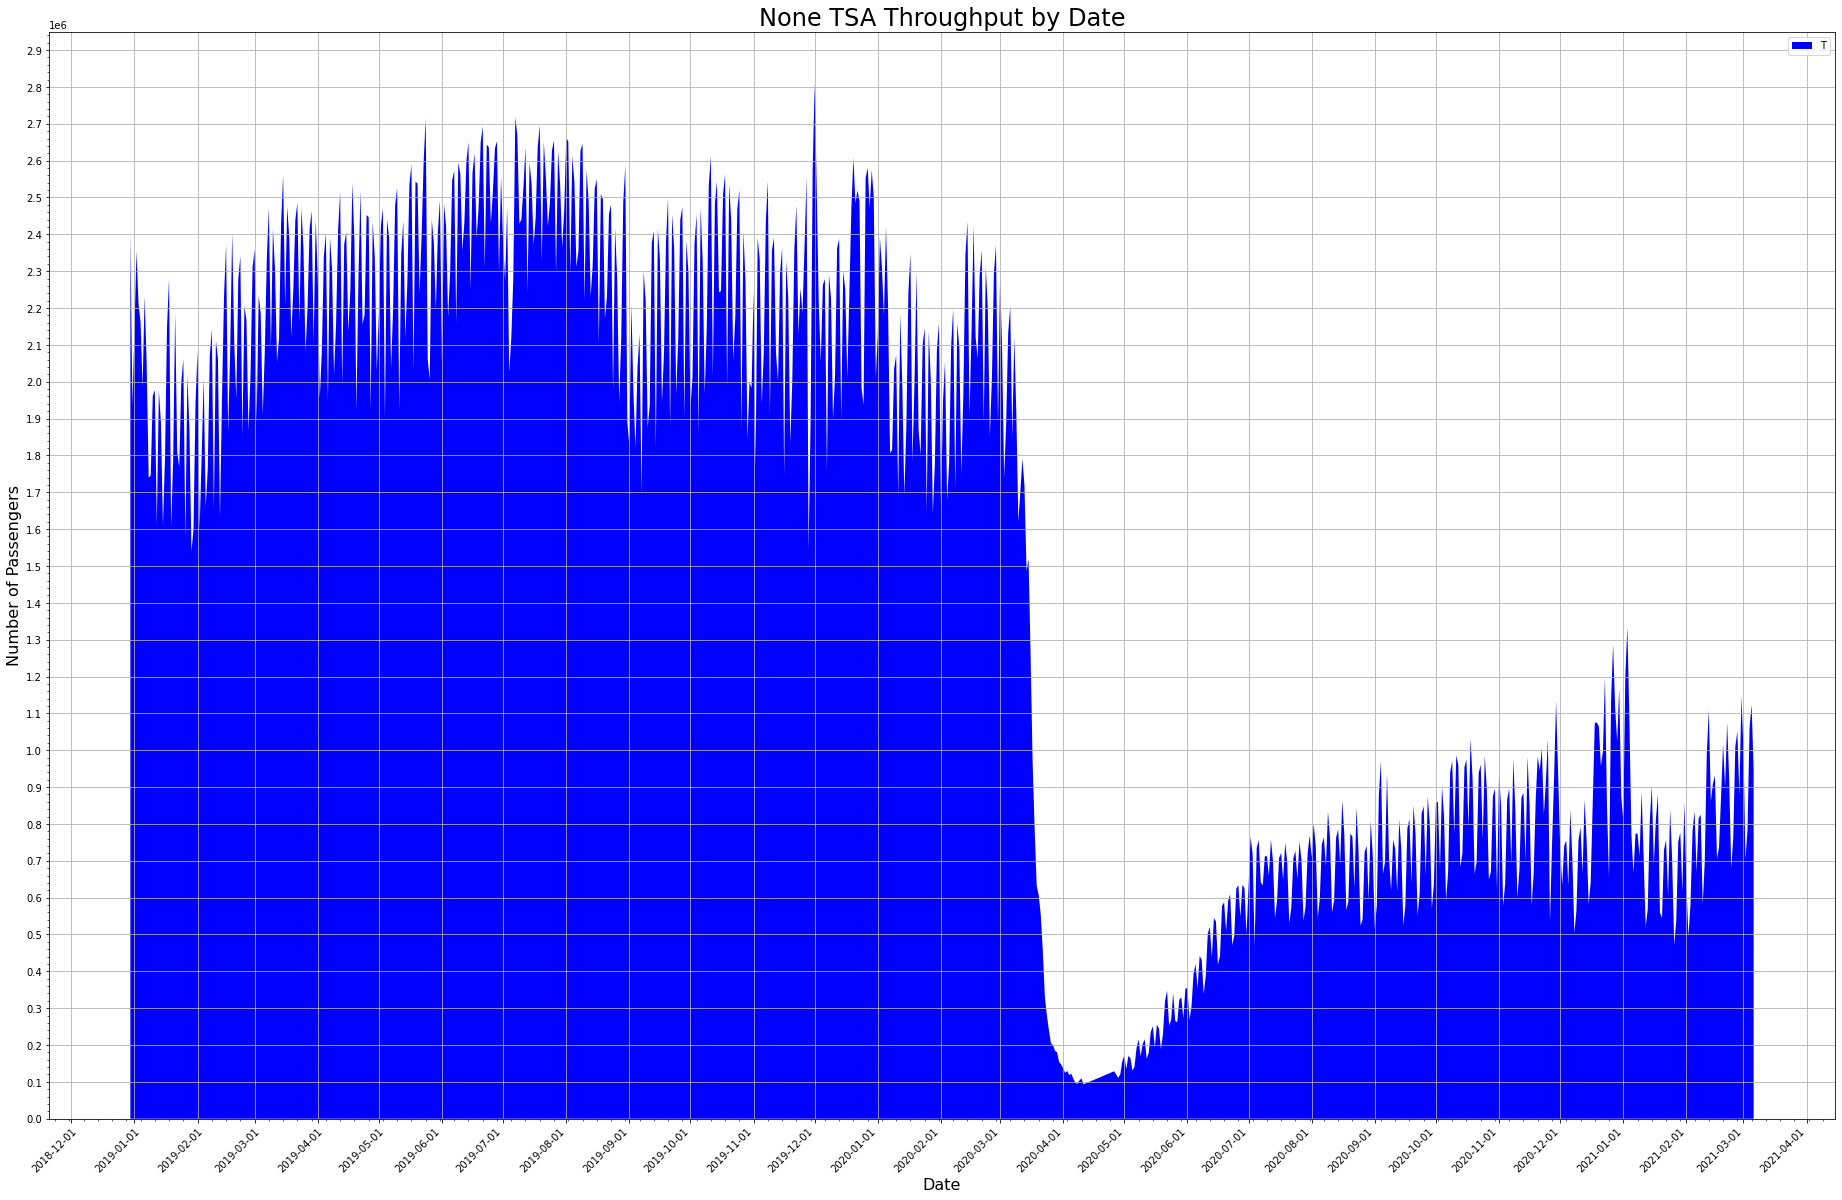

<Figure size 432x288 with 0 Axes>

In [13]:
plt.clf()
fig, ax = plt.subplots(figsize=(32, 20))

plt = setupChart(plt)
plt.stackplot(dfg['Date'], dfg['Total'], labels='Total', colors='blue')
plt.legend()
plt.show()
plt.savefig(r'/mnt/c/tmp/figure1-AreaSCP345.jpg')


<Figure size 432x288 with 0 Axes>

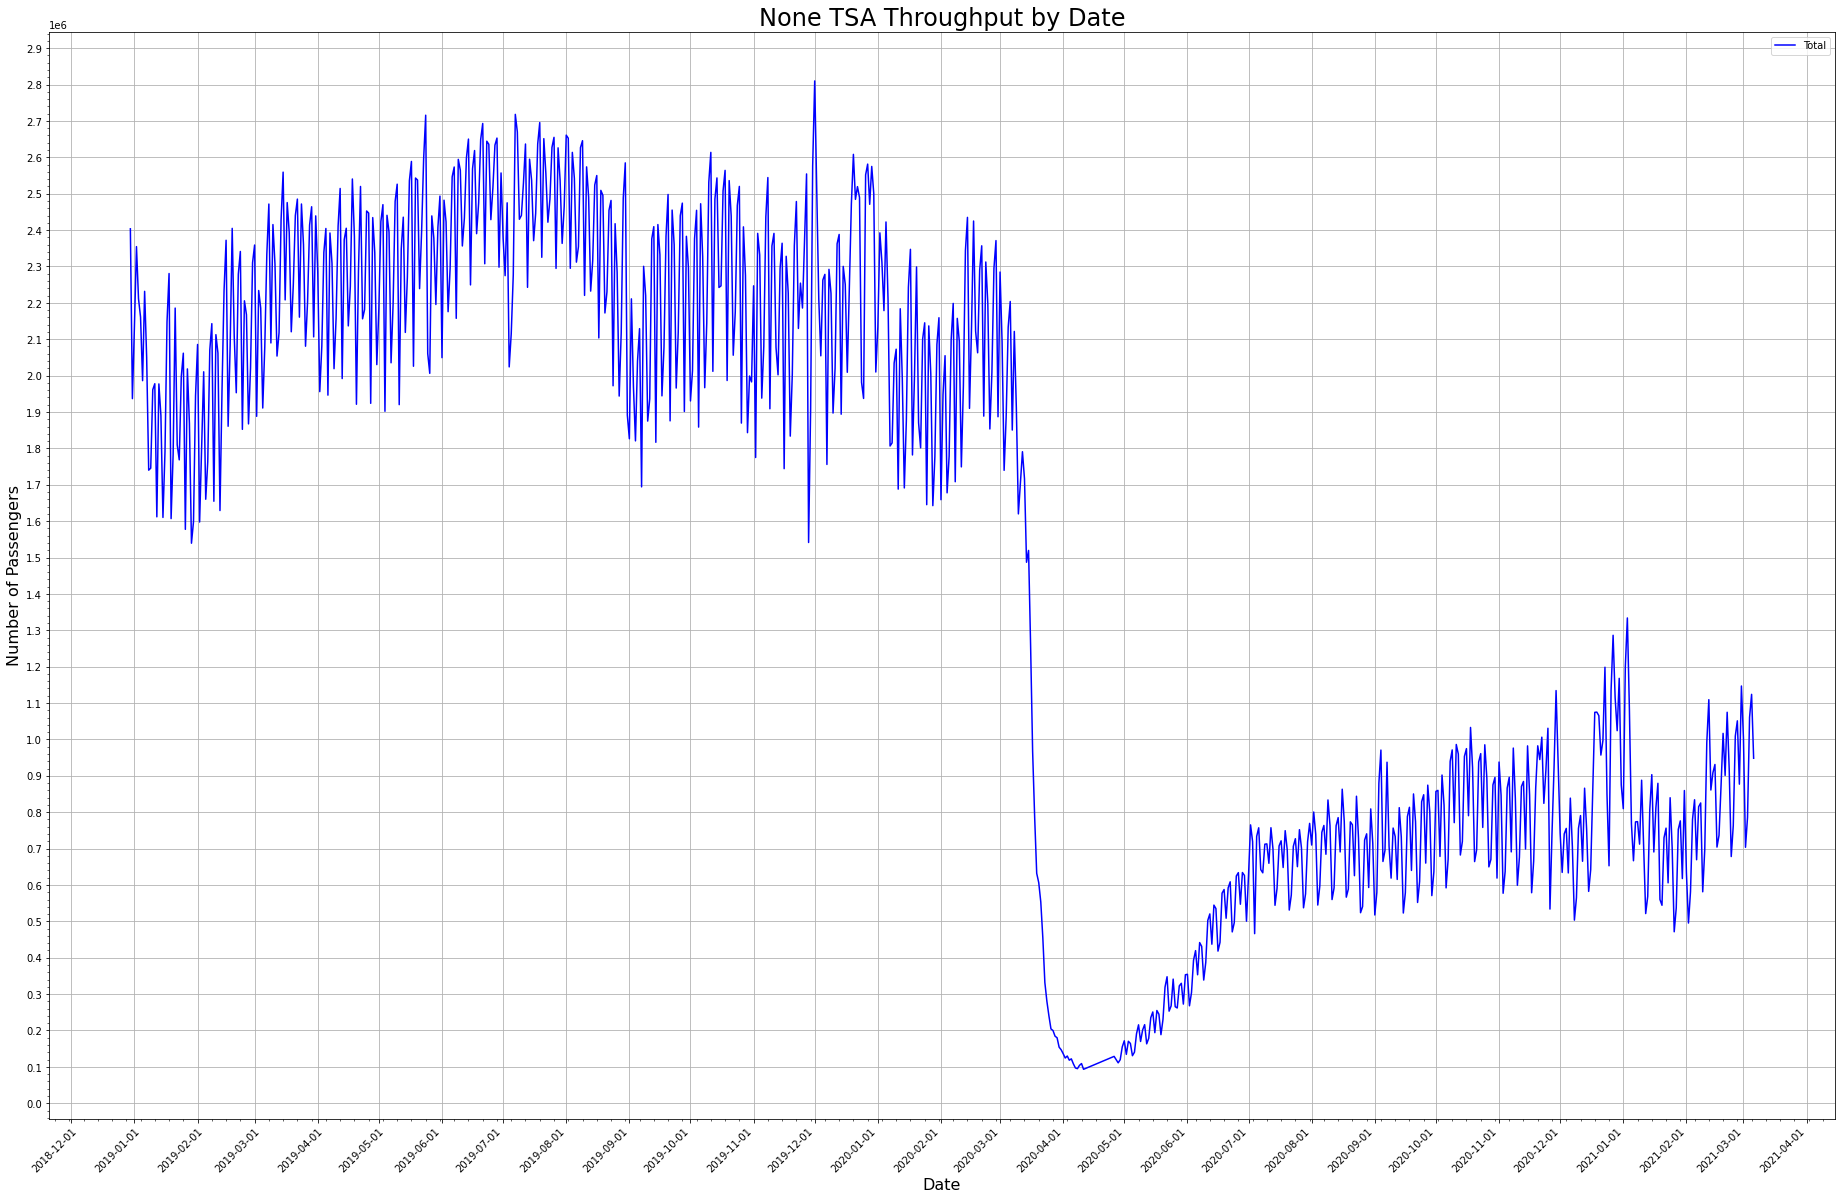

<Figure size 432x288 with 0 Axes>

In [14]:
plt.clf()
fig, ax = plt.subplots(figsize=(32, 20))



plt = setupChart(plt)
plt = buildLineChart(plt, dfg)
plt.legend()
plt.show()
plt.savefig(r'/mnt/c/tmp/figure2-LineSCP345.jpg')

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(32, 20))

plt = setupChart(plt)
plt = buildLineChart(plt, dfg, labels, colors)
plt.legend()
plt.show()
plt.savefig(r'/mnt/c/tmp/figure3-LineSCP12FIS.jpg')

<Figure size 432x288 with 0 Axes>

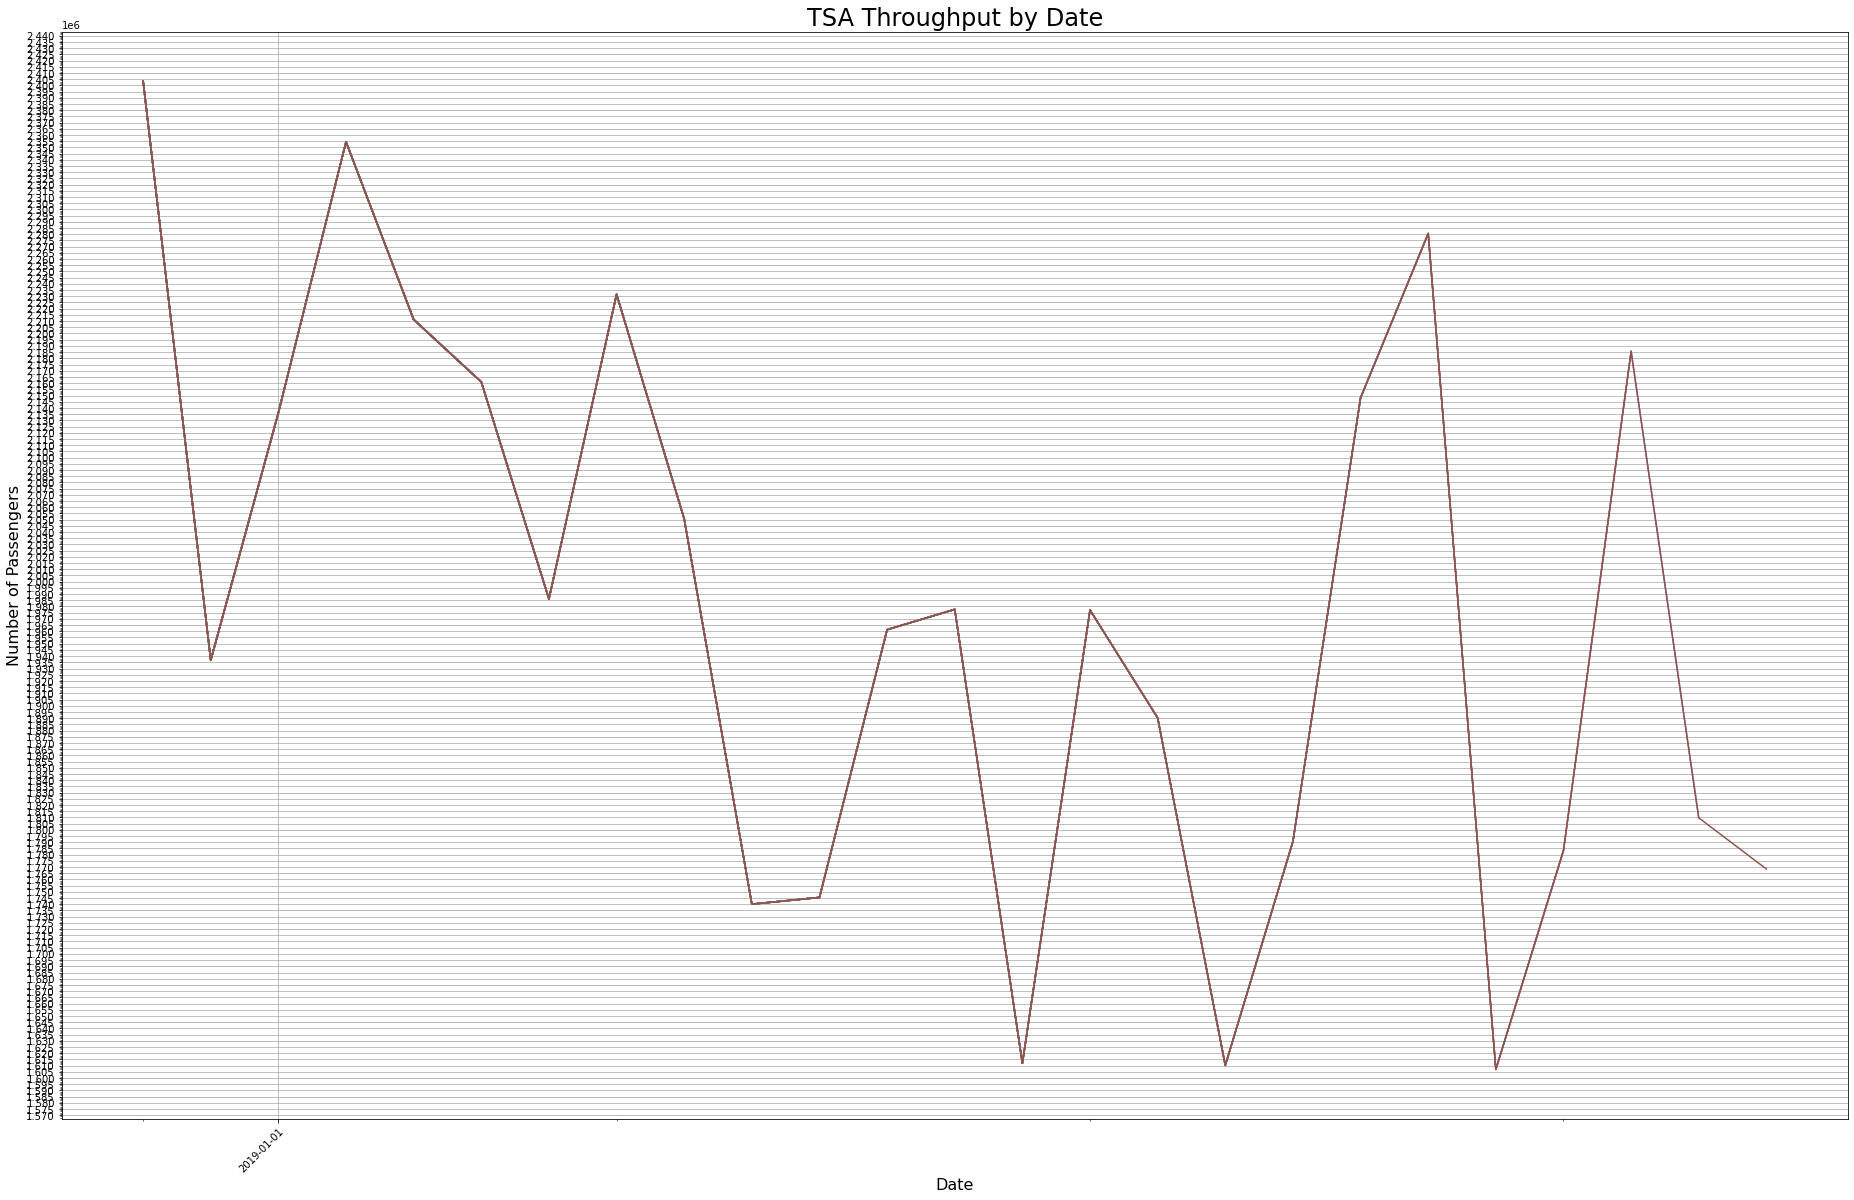

In [16]:
plt.clf()
fig, ax = plt.subplots(figsize=(32, 20))
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")


ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

ax.yaxis.set_major_locator(ticker.MultipleLocator(5000))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1000))

plt.title('TSA Throughput by Date', fontsize=24)
plt.ylabel('Number of Passengers', fontsize=16)
plt.xlabel('Date', fontsize=16)

plt.grid(True)

animation = ani.FuncAnimation(fig, animateChart, frames=25, interval=50)
animation.save(r'/mnt/c/tmp/animation.gif', "ffmpeg")
